In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet201, VGG16, VGG19, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.applications.vgg16 import preprocess_input

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve

import csv

import sklearn
from sklearn.model_selection import train_test_split
import os
import numpy as np
import os
import shutil
import random
from matplotlib import pyplot as plt
import matplotlib

print("\nLibraries\n-----------------------------")
print(f"Tensorflow: {tf.__version__}")
print(f"Scikit Learn: {sklearn.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")


Libraries
-----------------------------
Tensorflow: 2.12.0
Scikit Learn: 1.3.1
Numpy: 1.22.0
Matplotlib: 3.7.0


In [2]:
def count_files_in_directory(directory_path):
    total_files = 0

    for root, _, files in os.walk(directory_path):
        total_files += len(files)

    return total_files

In [3]:
def create_test_set(source_dir, test_dir, class_names, test_percent):
    os.makedirs(test_dir, exist_ok = True)
    
    for class_name in class_names:
        class_source_dir = os.path.join(source_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)
        os.makedirs(class_test_dir, exist_ok = True)
        
        images = os.listdir(class_source_dir)
        num_images = len(images)
        num_test_images = int(test_percent * num_images)
        
        test_indices = random.sample(range(num_images), num_test_images)
        
        for index in test_indices:
            image_name = images[index]
            source_path = os.path.join(class_source_dir, image_name)
            target_path = os.path.join(class_test_dir, image_name)
            shutil.move(source_path, target_path)

In [4]:
# Define image dimensions and other parameters
img_height, img_width = 80, 400
num_classes = 3

data_dir = "./DS2/Train"
class_names = os.listdir(data_dir)

# test set
source_data_dir = "./DS2/Train"
test_data_dir = "./DS2/Testset"
valid_data_dir = "./DS2/Validset"
class_names = os.listdir(source_data_dir)

first_execution = True

if first_execution:
    create_test_set(source_data_dir, test_data_dir, class_names, 0.3)
    create_test_set(source_data_dir, valid_data_dir, class_names, 0.2)

In [5]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1.0 / 255.0,
    preprocessing_function = preprocess_input
)

data_generator = datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    classes = class_names
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        valid_data_dir,
        target_size = (img_height, img_width),
        batch_size = 32,
        class_mode = 'categorical',
        shuffle = True,
        classes = class_names
)

Found 370 images belonging to 3 classes.
Found 91 images belonging to 3 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    batch_size = count_files_in_directory(test_data_dir),
    shuffle = False,
    classes = class_names
)

Found 194 images belonging to 3 classes.


In [7]:
base_model = VGG16(include_top = False, input_shape = (img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation = 'relu', kernel_initializer = 'uniform')(x)
#x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

model.compile(optimizer = SGD(learning_rate = 0.001, momentum = 0.9),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(data_generator, epochs = 100,
                    validation_data = validation_generator)

Epoch 1/100
12/12 [==============================] - 17s 1s/step - loss: 1.4608 - accuracy: 0.6811 - val_loss: 1.1277 - val_accuracy: 0.7582
Epoch 2/100
12/12 [==============================] - 16s 1s/step - loss: 0.9254 - accuracy: 0.7378 - val_loss: 0.7251 - val_accuracy: 0.8022
Epoch 3/100
12/12 [==============================] - 16s 1s/step - loss: 0.7430 - accuracy: 0.7432 - val_loss: 0.6483 - val_accuracy: 0.7692
Epoch 4/100
12/12 [==============================] - 16s 1s/step - loss: 0.7093 - accuracy: 0.7405 - val_loss: 0.5894 - val_accuracy: 0.7802
Epoch 5/100
12/12 [==============================] - 16s 1s/step - loss: 0.7076 - accuracy: 0.7541 - val_loss: 0.5573 - val_accuracy: 0.7582
Epoch 6/100
12/12 [==============================] - 16s 1s/step - loss: 0.6595 - accuracy: 0.7595 - val_loss: 0.5269 - val_accuracy: 0.7692
Epoch 7/100
12/12 [==============================] - 16s 1s/step - loss: 0.6626 - accuracy: 0.7486 - val_loss: 0.5019 - val_accuracy: 0.8022
Epoch 8/100
1

Epoch 59/100
12/12 [==============================] - 16s 1s/step - loss: 0.4780 - accuracy: 0.8189 - val_loss: 0.3415 - val_accuracy: 0.8681
Epoch 60/100
12/12 [==============================] - 16s 1s/step - loss: 0.4578 - accuracy: 0.8432 - val_loss: 0.3204 - val_accuracy: 0.8681
Epoch 61/100
12/12 [==============================] - 16s 1s/step - loss: 0.4283 - accuracy: 0.8297 - val_loss: 0.3836 - val_accuracy: 0.8791
Epoch 62/100
12/12 [==============================] - 16s 1s/step - loss: 0.5151 - accuracy: 0.8027 - val_loss: 0.3138 - val_accuracy: 0.8681
Epoch 63/100
12/12 [==============================] - 16s 1s/step - loss: 0.4807 - accuracy: 0.8297 - val_loss: 0.3063 - val_accuracy: 0.8791
Epoch 64/100
12/12 [==============================] - 16s 1s/step - loss: 0.4912 - accuracy: 0.8324 - val_loss: 0.3685 - val_accuracy: 0.8571
Epoch 65/100
12/12 [==============================] - 16s 1s/step - loss: 0.4566 - accuracy: 0.8297 - val_loss: 0.3115 - val_accuracy: 0.8901
Epoch 

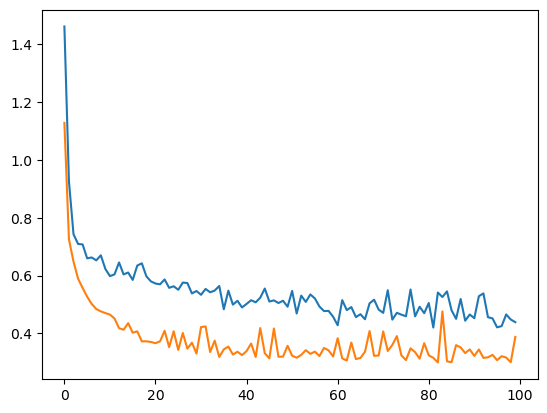

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

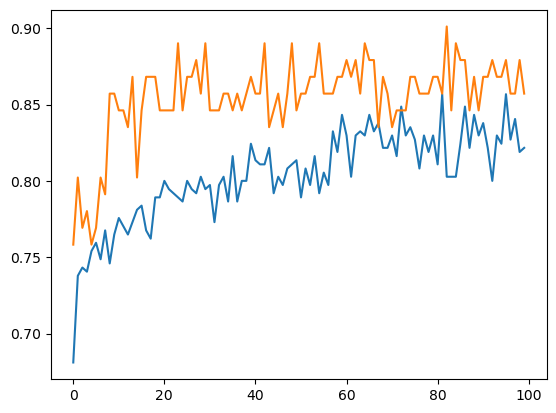

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [10]:
real_labels = []
original_probs = []
original_labels = []
adversarial_probs = []
adversarial_labels = []

batch_images, batch_labels = next(test_generator)

for individual_image in range(batch_images.shape[0]):
    single_image_array = batch_images[individual_image]
    single_image_label = batch_labels[individual_image]
    
    original_prob = model.predict(np.expand_dims(single_image_array, axis=0))
    original_pred = np.argmax(original_prob)
    
    target_image = tf.convert_to_tensor(np.expand_dims(single_image_array, axis=0))
    with tf.GradientTape() as tape:
        tape.watch(target_image)
        prediction = model(target_image)
        loss = tf.keras.losses.binary_crossentropy(single_image_label, prediction[0])
    gradient = tape.gradient(loss, target_image)
    perturbed_image = target_image + 0.007 * tf.sign(gradient)
    
    adversarial_prob = model.predict(np.expand_dims(perturbed_image[0], axis=0))
    adversarial_pred = np.argmax(adversarial_prob)
    
    real_labels.append(single_image_label)
    original_probs.append(original_prob[0, original_pred])
    adversarial_probs.append(adversarial_prob[0, adversarial_pred])
    original_labels.append(original_pred)
    adversarial_labels.append(adversarial_pred)

original_probs = np.array(original_probs).reshape(-1)
adversarial_probs = np.array(adversarial_probs).reshape(-1)
adversarial_labels = np.array(adversarial_labels).reshape(-1)
original_labels = np.array(original_labels).reshape(-1)

1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 76ms/step


In [11]:
class_labels = []
for array in real_labels:
    class_label = np.argmax(array)
    class_labels.append(class_label)
real_labels = class_labels

In [12]:
indices0 = [index for index, value in enumerate(real_labels) if value == 0]
indices1 = [index for index, value in enumerate(real_labels) if value == 1]
indices2 = [index for index, value in enumerate(real_labels) if value == 2]

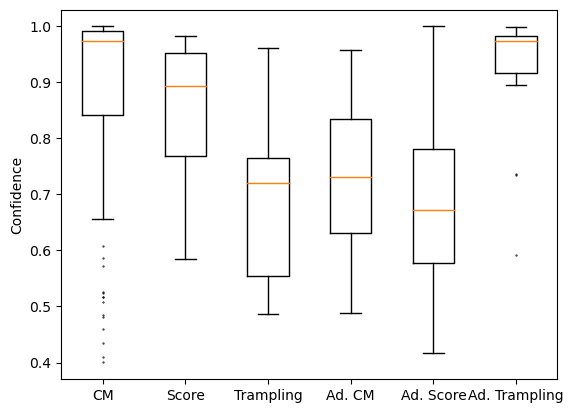

In [13]:
original_cm_probs = original_probs[indices0]
original_score_probs = original_probs[indices1]
original_trampling_probs = original_probs[indices2]

adversarial_cm_probs = adversarial_probs[indices0]
adversarial_score_probs = adversarial_probs[indices1]
adversarial_trampling_probs = adversarial_probs[indices2]

data = [original_cm_probs, original_score_probs, original_trampling_probs,
       adversarial_cm_probs, adversarial_score_probs, adversarial_trampling_probs]
labels = ["CM", "Score", "Trampling", "Ad. CM", "Ad. Score", "Ad. Trampling"]
plt.boxplot(data, flierprops = dict(
    marker = ".", markersize = 1
))
plt.ylabel("Confidence")
plt.xticks([1, 2, 3, 4, 5, 6], labels)
plt.show()

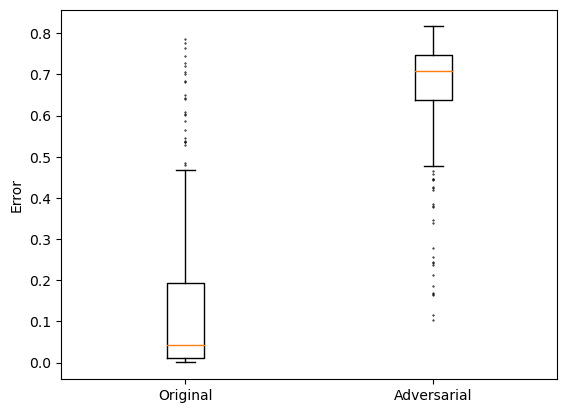

In [14]:
original_errors = []
adversarial_errors = []

for individual_image in range(batch_images.shape[0]):
    single_image_array = batch_images[individual_image]
    single_image_label = batch_labels[individual_image]
    
    original_prob = model.predict(np.expand_dims(single_image_array, axis=0), verbose = 0)
    original_error = np.sqrt(np.mean((original_prob - single_image_label) ** 2))
    
    target_image = tf.convert_to_tensor(np.expand_dims(single_image_array, axis=0))
    with tf.GradientTape() as tape:
        tape.watch(target_image)
        prediction = model(target_image)
        loss = tf.keras.losses.binary_crossentropy(single_image_label, prediction[0])
    gradient = tape.gradient(loss, target_image)
    perturbed_image = target_image + 0.007 * tf.sign(gradient)
    
    adversarial_prob = model.predict(np.expand_dims(perturbed_image[0], axis=0), verbose = 0)
    adversarial_error = np.sqrt(np.mean((adversarial_prob - single_image_label) ** 2))
    
    original_errors.append(original_error)
    adversarial_errors.append(adversarial_error)

original_errors = np.array(original_errors).reshape(-1)
adversarial_errors = np.array(adversarial_errors).reshape(-1)

data = [original_errors, adversarial_errors]
labels = ["Original", "Adversarial"]

plt.boxplot(data, flierprops = dict(
    marker = ".", markersize = 1
))
plt.xticks([1, 2], labels)
plt.ylabel("Error")
plt.show()

In [15]:

print(f"Original Tooth Score Loss {np.mean(original_errors[indices1]) * 100:.2f}%")
print(f"Original Cut Mark Loss {np.mean(original_errors[indices0]) * 100:.2f}%")
print(f"Original Trampling Mark Loss {np.mean(original_errors[indices2]) * 100:.2f}%")
print(f"Adversarial Tooth Score Loss {np.mean(adversarial_errors[indices1]) * 100:.2f}%")
print(f"Adversarial Cut Mark Loss {np.mean(adversarial_errors[indices0]) * 100:.2f}%")
print(f"Adversarial Trampling Mark Loss {np.mean(adversarial_errors[indices2]) * 100:.2f}%")

print("\n----------------------------------\n")

print(f"Original Loss {np.mean(original_errors) * 100:.2f}%")
print(f"Adversarial Loss {np.mean(adversarial_errors) * 100:.2f}%")

Original Tooth Score Loss 15.34%
Original Cut Mark Loss 10.14%
Original Trampling Mark Loss 55.30%
Adversarial Tooth Score Loss 49.18%
Adversarial Cut Mark Loss 67.53%
Adversarial Trampling Mark Loss 77.40%

----------------------------------

Original Loss 15.13%
Adversarial Loss 65.61%


In [16]:
print(classification_report(real_labels, adversarial_labels))
print(confusion_matrix(real_labels, adversarial_labels))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09       146
           1       0.06      0.33      0.11        30
           2       0.00      0.00      0.00        18

    accuracy                           0.09       194
   macro avg       0.19      0.13      0.06       194
weighted avg       0.39      0.09      0.08       194

[[  7 131   8]
 [  6  10  14]
 [  1  17   0]]


In [17]:
print(classification_report(real_labels, original_labels))
print(confusion_matrix(real_labels, original_labels))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       146
           1       0.54      0.93      0.68        30
           2       0.80      0.22      0.35        18

    accuracy                           0.86       194
   macro avg       0.77      0.69      0.66       194
weighted avg       0.89      0.86      0.85       194

[[134  11   1]
 [  2  28   0]
 [  1  13   4]]


In [18]:
print(classification_report(original_labels, adversarial_labels))
print(confusion_matrix(original_labels, adversarial_labels))

              precision    recall  f1-score   support

           0       0.71      0.07      0.13       137
           1       0.22      0.65      0.32        52
           2       0.05      0.20      0.07         5

    accuracy                           0.23       194
   macro avg       0.32      0.31      0.18       194
weighted avg       0.56      0.23      0.18       194

[[ 10 120   7]
 [  4  34  14]
 [  0   4   1]]


In [19]:
return_files = True

if return_files:
    source_folders = ["./DS2/Testset", "./DS2/Validset"]
    destination_folder = "./DS2/Train"

    for source_folder in source_folders:
        source_path = os.path.join(source_folder, "CutMark")
        destination_path = os.path.join(destination_folder, "CutMark")

        for filename in os.listdir(source_path):
            source_file = os.path.join(source_path, filename)
            destination_file = os.path.join(destination_path, filename)
            shutil.move(source_file, destination_file)

        source_path = os.path.join(source_folder, "Score")
        destination_path = os.path.join(destination_folder, "Score")

        for filename in os.listdir(source_path):
            source_file = os.path.join(source_path, filename)
            destination_file = os.path.join(destination_path, filename)
            shutil.move(source_file, destination_file)

        source_path = os.path.join(source_folder, "Trampling")
        destination_path = os.path.join(destination_folder, "Trampling")

        for filename in os.listdir(source_path):
            source_file = os.path.join(source_path, filename)
            destination_file = os.path.join(destination_path, filename)
            shutil.move(source_file, destination_file)

    print("Files moved successfully.")

Files moved successfully.
